#1. Import de Bibliotecas:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!apt-get install megatools
!megadl 'https://mega.nz/folder/1U43jIqR#-hIdN7PGN6tH2QrBkF6TtQ'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 207 kB of archives.
After this operation, 898 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 megatools amd64 1.10.3-1build1 [207 kB]
Fetched 207 kB in 0s (839 kB/s)
Selecting previously unselected package megatools.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../megatools_1.10.3-1build1_amd64.deb ...
Unpacking megatools (1.10.3-1build1) ...
Setting up megatools (1.10.3-1build1) ...
Processing triggers for man-db (2.10.2-1) ...
F /content/Caminhao/Input1.txt
F /content/Caminhao/Input2.txt


#2. Desenvolvimento do Trabalho:


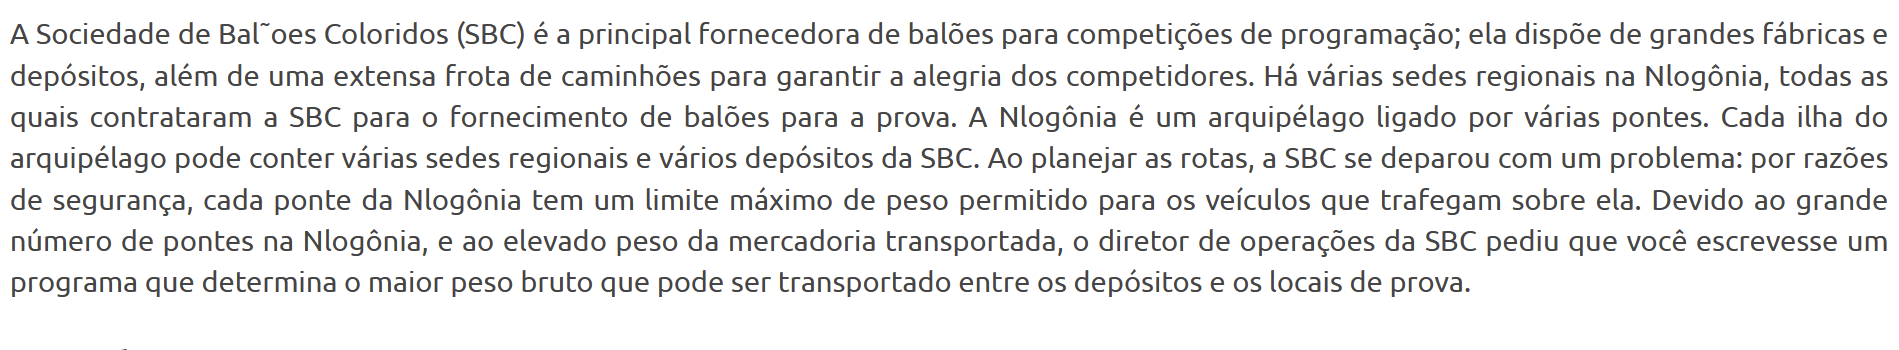


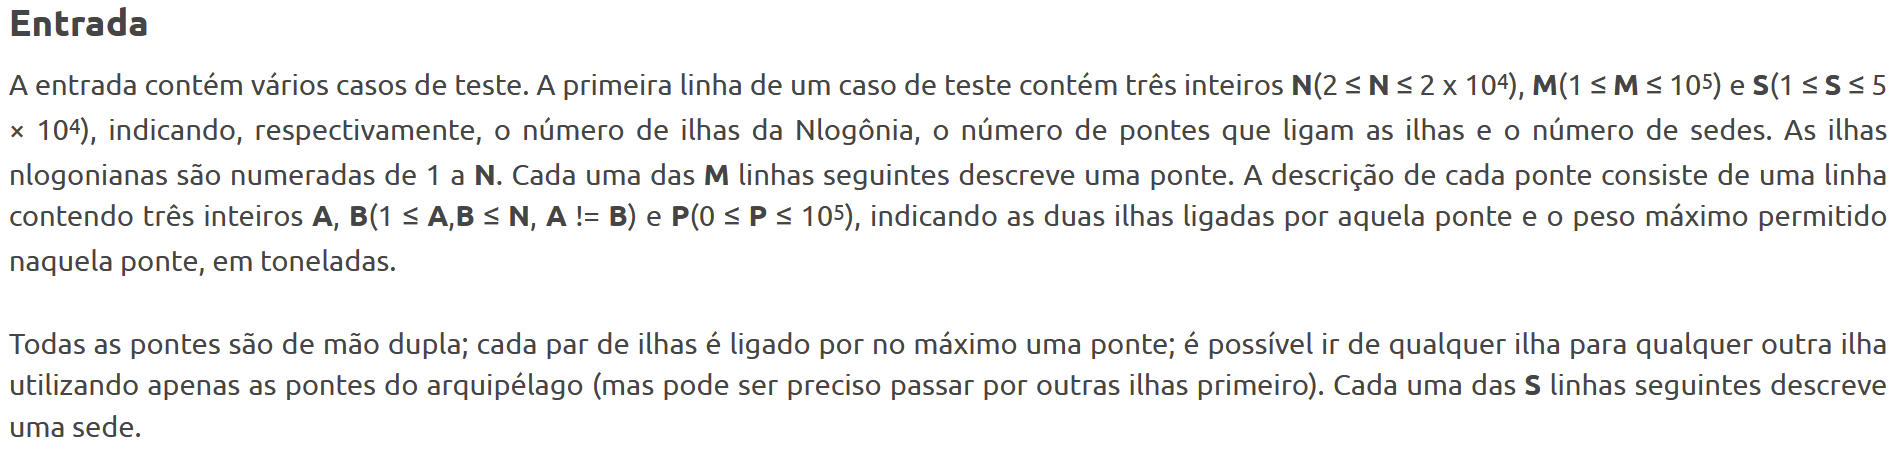

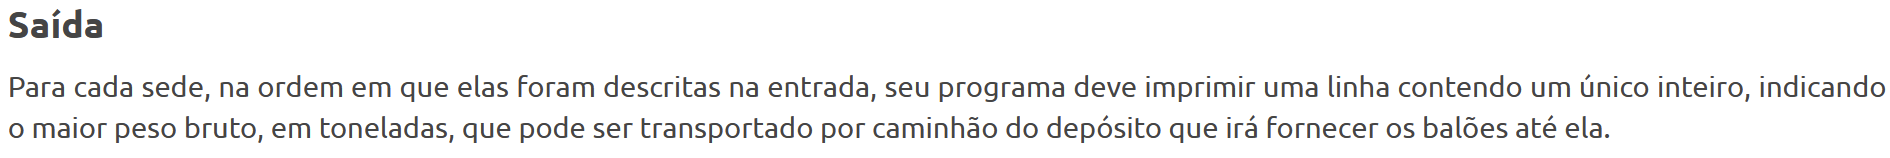

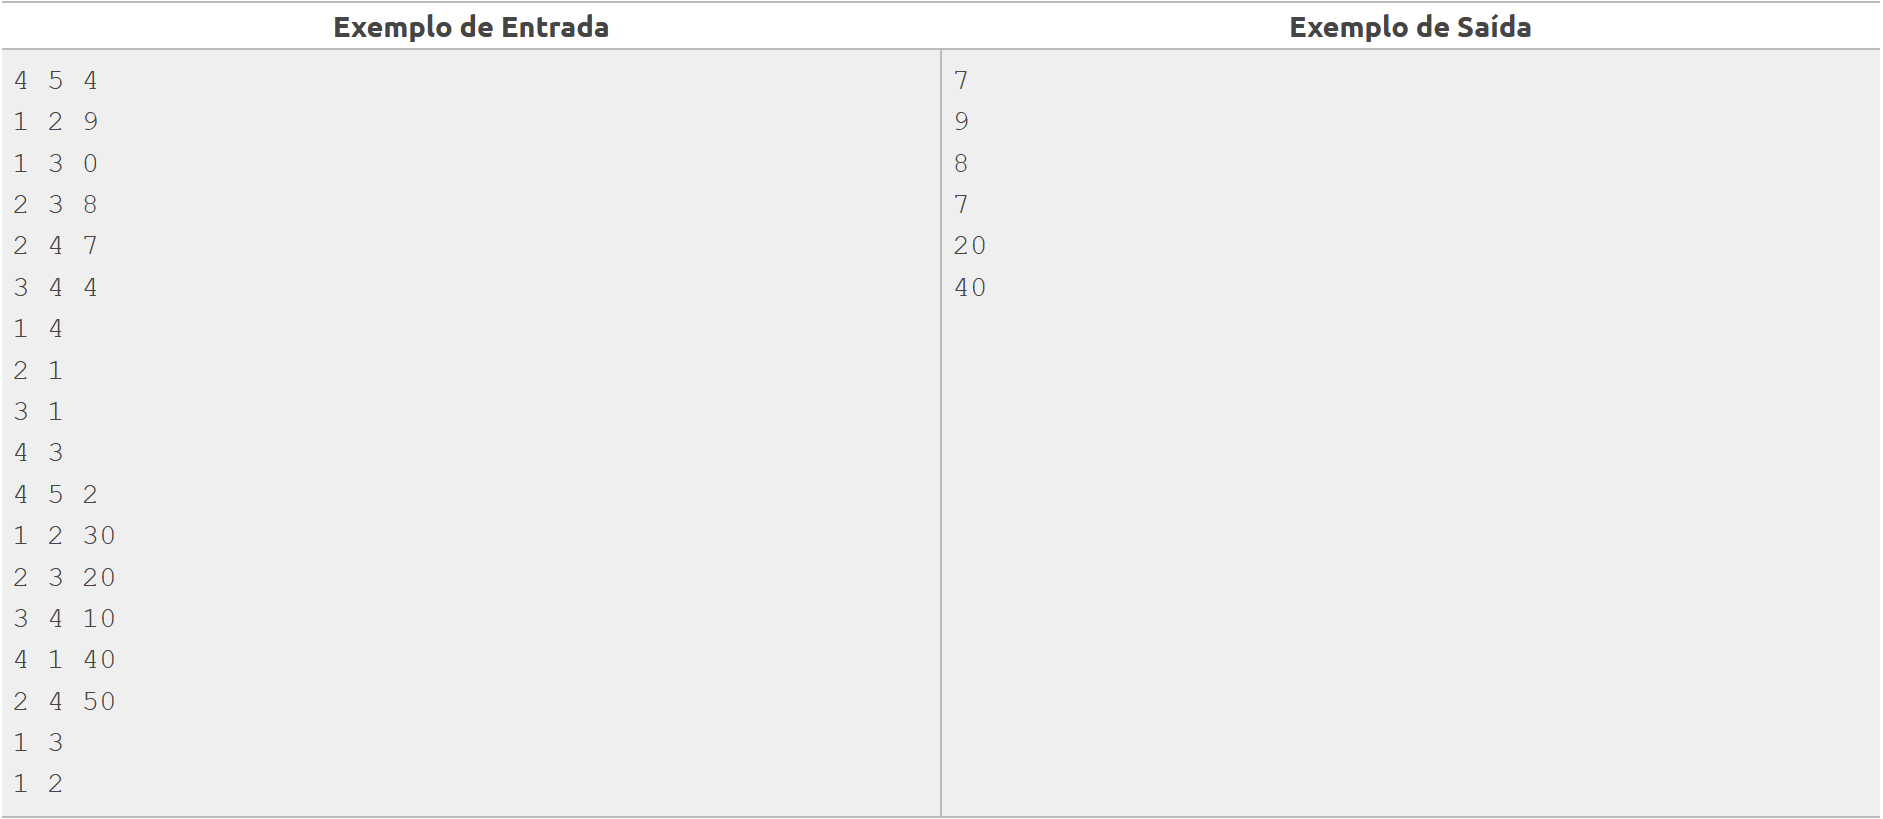

Primeira Linha: <p>
1¬∫: N¬∫ de Ilhas <p>
2¬∫: N¬∫ de Pontes <p>
3¬∫: Sedes

Linha Ponte: <p>
1¬∫: Origem <p>
2¬∫: Destino <p>
3¬∫: Peso m√°ximo

Linha Sedes: <p>
1¬∫: In√≠cio do Trajeto <p>
2¬∫: Fim do Trajeto

In [58]:
matriz = []
with open("/content/Caminhao/Input1.txt", "r") as file:
    for line in file:
      if line == "\n":
        continue
      else:
        numeros = list(map(int, line.strip().split()))
        matriz.append(numeros)

print(matriz)

[[4, 5, 4], [1, 2, 9], [1, 3, 0], [2, 3, 8], [2, 4, 7], [3, 4, 4], [1, 4], [2, 1], [3, 1], [4, 3], [4, 5, 2], [1, 2, 30], [2, 3, 20], [3, 4, 10], [4, 1, 40], [2, 4, 50], [1, 3], [1, 2]]


##2.1. Algoritmo de Djikstra

Inicialmente, buscamos utilizar ferramentas prontas do pr√≥prio networkX para a execu√ß√£o do trabalho, bem como entender o funcionamento do algoritmo e como utiliz√°-lo para a realiza√ß√£o do exerc√≠cio. <p>
Escolhemos o algoritmo de Djikstra pois ele tem um objetivo semelhante, na qual apenas mudar o funcionamento dos pesos talvez funcionaria. <p>
Mas com testes, vimos que ele obteve falhas de funcionamento para salvar os caminhos, e como est√°vamos utilizando uma fun√ß√£o pronta, decidimos procurar algoritmos de Djikstra abertos e modific√°-los para o nosso objetivo de maximizar o menor peso poss√≠vel (O Djikstra busca Minimizar a soma).

In [59]:
def djiks(grafo, inicio, fim):
    # Transformar pesos para maximizar o peso m√≠nimo (Dijkstra minimiza soma)
    max_peso = max(c['weight'] for a, b, c in grafo.edges(data=True)) + 1
    grafo_transformado = nx.Graph()
    for a, b, c in grafo.edges(data=True):
        grafo_transformado.add_edge(a, b, weight=max_peso - c['weight'])

    # Verificar se existe caminho entre inicio e fim
    if not nx.has_path(grafo_transformado, inicio, fim):
        return [], float('-inf')

    # Encontrar o caminho usando dijkstra_path
    caminho = nx.dijkstra_path(grafo_transformado, inicio, fim, weight='weight')
    # Calcular o peso m√≠nimo no grafo original
    peso_minimo = min(grafo[caminho[i]][caminho[i+1]]['weight']
                     for i in range(len(caminho) - 1))
    return caminho, peso_minimo


##2.2. Djikstra Modificado (Caminho de maior peso m√≠nimo)

Reunimos a base das informa√ß√µes do funcionamento do Djikstra e modificamos para se adequar ao nosso objetivo: <p>
  - Inicializar os pesos com valor infinito, por√©m diferente do n√≥ inicial
  - Utilizar o n√≥ de maior peso
  - Fazer uma lista dos caminhos visitados para evitar passar mais de uma vez
  - Iterar sobre os vizinhos e montar um caminho, mas desta vez, buscando o menor peso poss√≠vel dentro do caminho de maior peso. <p>

Al√©m disso, utilizando a fila de prioridades e a itera√ß√£o, o custo aproximado √© de (ùëÇ(ùëâ¬≤ + ùê∏)), que √© um custo razo√°vel, porem n√£o √© o ideal quando comparado ao algoritmo original do Djikstra (Custo O((V + E)logV)).

In [60]:
# Fun√ß√£o para encontrar o caminho com maior peso
def caminho_maior_peso(grafo, inicio, fim):
    # Inicializar os pesos m√°ximos e os caminhos
    pesos = {no: float('-inf') for no in grafo.nodes}
    pesos[inicio] = float('inf')  # Peso inicial √© o maior
    caminho = {no: [] for no in grafo.nodes}
    caminho[inicio] = [inicio]


    # Fila de prioridade
    visitados = set()
    nos = set(grafo.nodes)

    def maior_peso(no):
      return pesos[no]

    while nos:
        # Escolher o n√≥ com maior peso acumulado
        no_atual = max((no for no in nos if no not in visitados),
               key = maior_peso, default = None)
        if no_atual is None:
            break

        visitados.add(no_atual)
        nos.remove(no_atual)

        # Para cada vizinho do n√≥ atual
        for vizinho in grafo.neighbors(no_atual):
            if vizinho in visitados:
                continue

            # Peso da aresta
            peso_aresta = grafo[no_atual][vizinho]['weight']
            # Peso do caminho at√© o vizinho √© o m√≠nimo entre o peso acumulado e o peso da aresta
            peso_caminho = min(pesos[no_atual], peso_aresta)

            if peso_caminho > pesos[vizinho]:
                pesos[vizinho] = peso_caminho
                caminho[vizinho] = caminho[no_atual] + [vizinho]

    return caminho[fim], pesos[fim]


Com o c√≥digo funcionando, buscamos entender quais melhorias seriam poss√≠veis, e: <p>
  - Poder√≠amos utilizar outros algoritmos que usam a Maximum Spanning Tree, por√©m s√£o menos diretos para encontrar apenas um caminho.
  - Existe tamb√©m o algoritmo Floyd-Marshal, por√©m tem muito custo computacional, O(V¬≥)
  - A melhoria ideal ent√£o seria diminuir o custo computacional buscando outras maneiras de armazenar e manipular as informa√ß√µes, como um Max-heap (Custo O((V + E)logV), igual ao Djikstra original) ou um Fibonacci-heap (Custo O(E + V . logV))

##2.3. Processamento do restante das informa√ß√µes

In [61]:
# Fun√ß√£o para processar a matriz e separar os grafos
def processar_matriz(matriz):
    grafos = []
    i = 0
    while i < len(matriz):
        # Extrair informa√ß√µes do grafo atual
        num_ilhas, num_pontes, num_sedes = matriz[i]
        grafo_info = {
            "num_ilhas": num_ilhas,
            "num_pontes": num_pontes,
            "num_sedes": num_sedes,
            "pontes": [],
            "sedes": []
        }

        # Extrair as pontes
        for j in range(i + 1, i + 1 + num_pontes):
            grafo_info["pontes"].append(matriz[j])

        # Extrair as sedes
        for j in range(i + 1 + num_pontes, i + 1 + num_pontes + num_sedes):
            grafo_info["sedes"].append(matriz[j])

        grafos.append(grafo_info)
        i += 1 + num_pontes + num_sedes

    return grafos

# Fun√ß√£o para plotar o grafo e destacar o caminho
def plotar_grafo(grafo, caminho, inicio, fim, grafo_idx, trajeto_idx):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(grafo)

    # Desenhar o grafo
    # Arestas normais (em preto)
    nx.draw_networkx_edges(grafo, pos, edge_color='black', width=2)

    # Arestas do caminho destacado (em vermelho)
    if caminho:
        caminho_arestas = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
        nx.draw_networkx_edges(grafo, pos, edgelist=caminho_arestas, edge_color='red', width=3)

    # Desenhar os n√≥s
    nx.draw_networkx_nodes(grafo, pos, node_color='yellow', node_size=700)
    nx.draw_networkx_labels(grafo, pos, font_size=15, font_weight='bold')

    # Desenhar os pesos das arestas
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_size=12)

    # T√≠tulo do gr√°fico
    plt.title(f"Grafo {grafo_idx} - Trajeto de {inicio} para {fim}")
    plt.axis('off')
    plt.show()


##2.4. Processamento de grafo com algoritmos

In [62]:
# Fun√ß√£o para processar um grafo com djikstra e calcular os caminhos
def processar_grafo_djikstra(grafo_info, grafo_idx):
    num_ilhas = grafo_info["num_ilhas"]
    num_pontes = grafo_info["num_pontes"]
    num_sedes = grafo_info["num_sedes"]
    pontes = grafo_info["pontes"]
    sedes = grafo_info["sedes"]

    # Criar o grafo com NetworkX
    G = nx.Graph()
    # Adicionar n√≥s (ilhas)
    for i in range(1, num_ilhas + 1):
        G.add_node(i)

    # Adicionar arestas (pontes) com pesos
    for origem, destino, peso in pontes:
        G.add_edge(origem, destino, weight=peso)

    # Calcular o caminho com maior peso para cada trajeto
    resultados = []
    for idx, (inicio, fim) in enumerate(sedes, 1):
        caminho, peso = djiks(G, inicio, fim)
        resultados.append({
            "inicio": inicio,
            "fim": fim,
            "caminho": caminho,
            "peso": peso
        })

        # Plotar o grafo com o caminho destacado
        plotar_grafo(G, caminho, inicio, fim, grafo_idx, idx)

    return resultados

# Fun√ß√£o para processar um grafo com cmp e calcular os caminhos
def processar_grafo_cmp(grafo_info, grafo_idx):
    num_ilhas = grafo_info["num_ilhas"]
    num_pontes = grafo_info["num_pontes"]
    num_sedes = grafo_info["num_sedes"]
    pontes = grafo_info["pontes"]
    sedes = grafo_info["sedes"]

    # Criar o grafo com NetworkX
    G = nx.Graph()
    # Adicionar n√≥s (ilhas)
    for i in range(1, num_ilhas + 1):
        G.add_node(i)

    # Adicionar arestas (pontes) com pesos
    for origem, destino, peso in pontes:
        G.add_edge(origem, destino, weight=peso)

    # Calcular o caminho com maior peso para cada trajeto
    resultados = []
    for idx, (inicio, fim) in enumerate(sedes, 1):
        caminho, peso = caminho_maior_peso(G, inicio, fim)
        resultados.append({
            "inicio": inicio,
            "fim": fim,
            "caminho": caminho,
            "peso": peso
        })

        # Plotar o grafo com o caminho destacado
        plotar_grafo(G, caminho, inicio, fim, grafo_idx, idx)

    return resultados

#3. Resultado:


Resultados para o Grafo 1:


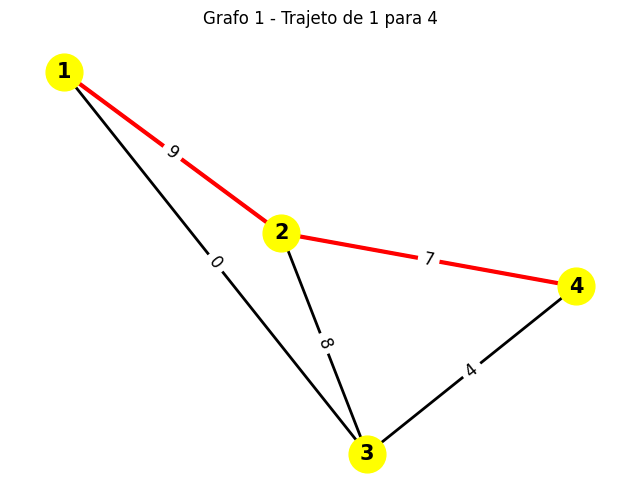

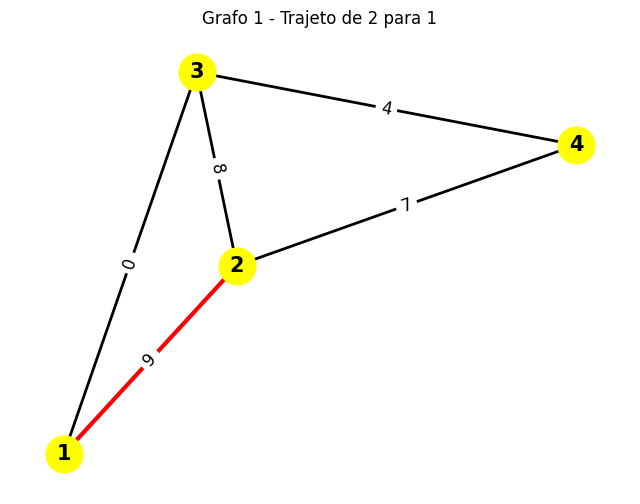

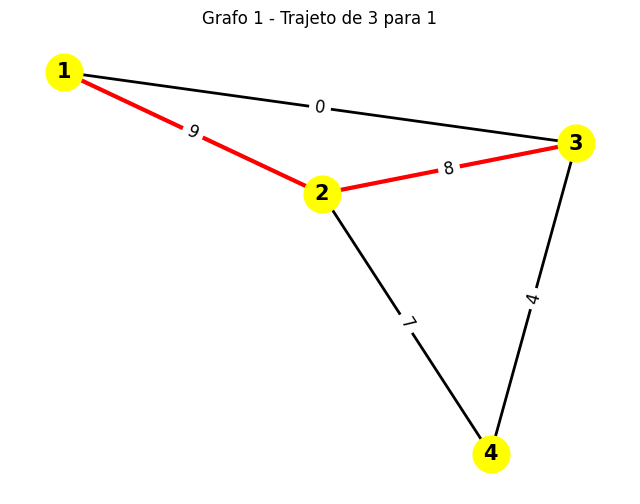

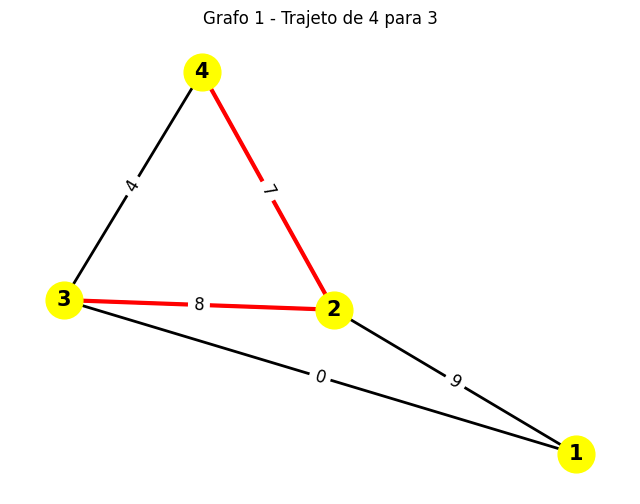

Trajeto de 1 para 4:
Caminho: [1, 2, 4]
Peso m√°ximo: 7

Trajeto de 2 para 1:
Caminho: [2, 1]
Peso m√°ximo: 9

Trajeto de 3 para 1:
Caminho: [3, 2, 1]
Peso m√°ximo: 8

Trajeto de 4 para 3:
Caminho: [4, 2, 3]
Peso m√°ximo: 7


Resultados para o Grafo 2:


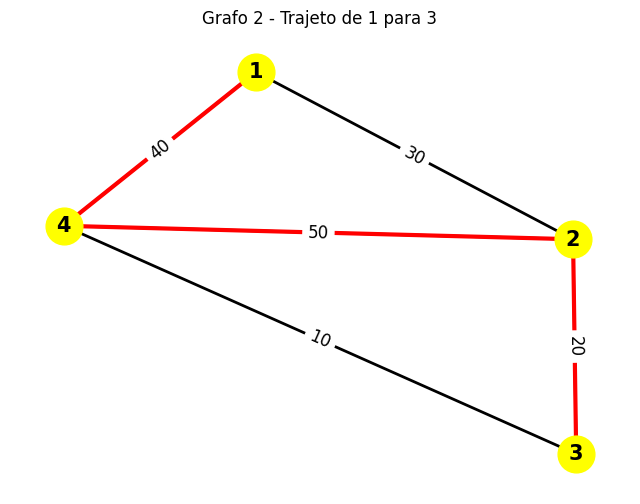

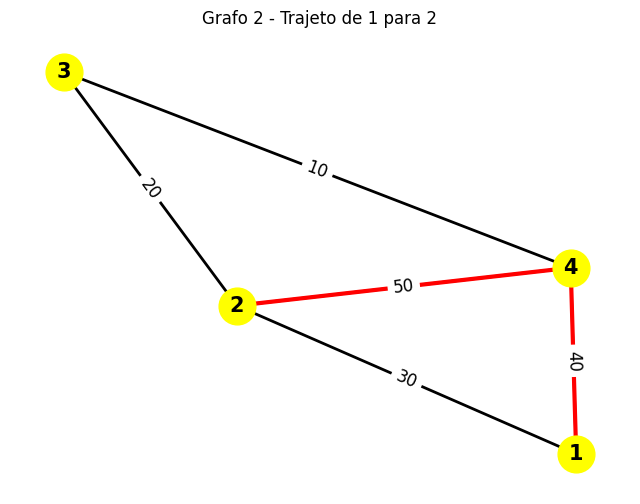

Trajeto de 1 para 3:
Caminho: [1, 4, 2, 3]
Peso m√°ximo: 20

Trajeto de 1 para 2:
Caminho: [1, 4, 2]
Peso m√°ximo: 40



In [63]:
# Passo 1: Separar os grafos
grafos = processar_matriz(matriz)

# Passo 2: Processar cada grafo e calcular os caminhos
for idx, grafo_info in enumerate(grafos, 1):
    print(f"\nResultados para o Grafo {idx}:")
    resultados = processar_grafo_cmp(grafo_info, idx)
    # processar_grafo_cmp / processar_grafo_djikstra

    for resultado in resultados:
        print(f"Trajeto de {resultado['inicio']} para {resultado['fim']}:")
        print(f"Caminho: {resultado['caminho']}")
        print(f"Peso m√°ximo: {resultado['peso']}")
        print()